### Scribers
    John Tristan Palanca
    Aditya Kumar
    Mariah Gaoiran

# The Curse of Dimensionality

In [1]:
from IPython.display import Image
import numpy as np
import scipy.spatial.distance as dist
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

## Euclidean Distance

Euclidean distance or Euclidean metric is the "ordinary" **straight-line distance** between two points in Euclidean space. The formula for finding the euclidean distance between two points can be determined by using the **Pythagorean theorem**. 


According to the Pythagorean theorem,

<img src="https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fstudy.com%2Fcimages%2Fmultimages%2F16%2Fpythagorean_theorem_proof_3.png&f=1" alt="drawing" style="width:500px;"/>

If we place the triangle on a graph we can see the following is true
<img src="./images/distance.png" alt="drawing" style="width:500px;"/>

$$
d^2 = (p_{1,y} - p_{1,x})^2 + (p_{2,x} - p_{2,y})^2
$$
where $d$(in green) is the distance between the two points (in blue).

Therefore, the Euclidean distance $d$ between two points can be derived from the following formula.
$$
d = \sqrt{(p_{1,y} - p_{1,x})^2 + (p_{2,x} - p_{2,y})^2}
$$

A live demo is available [here](https://www.desmos.com/calculator/uzqofq2c0t)

In three-dimensional space, the distance between two points can be determined by applying the Pythagorean theorem twice. 

<img src="./images/distance_3d.png" alt="drawing" style="width:500px;"/>


$$
𝑑((p_1,p_2),(q_1,q_2))= \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2}
$$

$$
𝑑((p_1,p_2,p_3),(q_1,q_2,q_3))= \sqrt{\sqrt{(q_1-p_1)^2 + (q_2-p_2)^2} + (q_3-p_3)^2}
$$
$$
𝑑((p_1,p_2,p_3),(q_1,q_2,q_3))= \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + (q_3-p_3)^2}
$$


Using induction it can be proved that in any arbitrary high-dimensional space, the distance between two points $(p_{1,x}, p_{2,x}, p_{3,x}, .... p_{n,x})$ and $(p_{1,y}, p_{2,y}, p_{3,y}, .... p_{n,y})$ can be determined using the following formula. 

$$
d = \sqrt{(p_{1,y} - p_{1,x})^2 + (p_{2,x} - p_{2,y})^2 + (p_{3,x} - p_{3,y})^2 + \ldots + (p_{n,x} - p_{n,y})^2}
$$



#### Mathematical Features of Euclidean Distance. 

The Euclidean distance is a metric. A metric is a mathematics function that defines a distance between each pair of elements of a set. 

Since the Euclidean distance function is a metric function it follows the mathematical definition of a metric function. 

<img src="./images/metric.png" alt="drawing" style="width:500px;"/>

### Computing the Euclidean distance using `scipy`


Fortunately, the calculation of the many distances including the Euclidean distance can be made using the [scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) module.

To compute the euclidean distance use [scipy.spatial.distance.euclidean](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean)

In [2]:
u = np.array([1,2,3])
v = np.array([1,2,3])
dist.euclidean(u,v)

0.0

In [3]:
u = np.array([0,0,0])
v = np.array([1,2,0])
print(dist.euclidean(u,v))
print(np.sqrt(sum((u-v)**2)))

2.23606797749979
2.23606797749979


In [4]:
u = np.array([1,2,3])
v = np.array([3,6,9])
print(dist.euclidean(u,v))
print(np.sqrt(sum((u-v)**2)))

7.483314773547883
7.483314773547883


# The Curse of Dimensionality

There a number of results that may be non-intuitive that occur in higher dimensions. This is broadly referred to as the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)


To observe one of these peculiarities let's generate **1,000 random points** in $\mathbb{R}$, Real Number space with **increasing dimensionality** and compute the **average pairwise Euclidean distance** between all the points.

In [5]:
a = [1,2,3]
import itertools
list(itertools.combinations(a, 2))

[(1, 2), (1, 3), (2, 3)]

#### Average pairwise distance 1,000 random points in $\mathbb{R}^1$ in 1-dimensional normalized space

In this context, when we generate points in **normalized space** we mean that all generated points will have coordinates in the range of [0,1). This method of normalization is called feature scaling. **Feature scaling** is used to standardize the range of independent variables or features of data.

numpy.random.rand will create an array of the given shape (1 by default) and populate it with random samples from a uniform distribution over [0, 1).

In [6]:
points = []
for _ in range(1000):
    p = np.array(np.random.rand())
    points.append(p)

total_distance = 0
nb_pairs = 0

for pair in list(itertools.combinations(points, 2)):
    nb_pairs +=1 
    total_distance += dist.euclidean(pair[0],pair[1])
    
print("Average distance is %s" % (total_distance/nb_pairs))
    

Average distance is 0.3267918942605676


#### Average pairwise distance 1,000 random points in $\mathbb{R}^2$ in 2-dimensional normalized space
Now lets generate 1,000 random points in $\mathbb{R}^2$ in  two-dimensional normalized space and compute the average pairwise Euclidean distance between all the points 

In [7]:
points = []
for _ in range(1000):
    p = np.array([np.random.rand(), np.random.rand()])
    points.append(p)

total_distance = 0
nb_pairs = 0

for pair in list(itertools.combinations(points, 2)):
    nb_pairs +=1 
    total_distance += dist.euclidean(pair[0],pair[1])
    
print("Average distance is %s" % (total_distance/nb_pairs))
    

Average distance is 0.5219648499170301


Note that by **increasing the dimensionality** of the points the **average distance between all points** has **increased**. This result is intuitive. By giving the points an additional dimension to be dispersed the average distance between them has increased. 

#### Average pairwise distance of 1,000 random points in $\mathbb{R}^3$ in 3-dimensional normalized space

In [8]:
points= []
for _ in range(1000):
    p = np.array([np.random.rand(), np.random.rand(), np.random.rand()])
    points.append(p)

total_distance = 0
nb_pairs = 0

for pair in list(itertools.combinations(points, 2)):
    nb_pairs +=1 
    total_distance += dist.euclidean(pair[0],pair[1])
    
print("Average distance is %s" % (total_distance/nb_pairs))

Average distance is 0.6625898936382913


#### Average pairwise distance of 1,000 points in $\mathbb{R}^{30}$ in 30-dimensional normalized space

In [9]:
points= []
for _ in range(1000):
    p = np.array([np.random.rand() for _ in range(30)])
    points.append(p)

total_distance = 0
nb_pairs = 0

for pair in list(itertools.combinations(points, 2)):
    nb_pairs +=1 
    total_distance += dist.euclidean(pair[0],pair[1])
    
print("Average distance is %s" % (total_distance/nb_pairs))

Average distance is 2.2249381090585225


#### Average Pairwise Euclidean Distance for Multiple Dimensions. 

Lets graph average pairwise euclidean distance between all points for multiple dimensions. 

Average distance is 0.31183214200912135
Average distance is 0.5229481174781984
Average distance is 0.6649819638054801
Average distance is 0.7824663430929539
Average distance is 0.8876706163407686
Average distance is 0.9711278878931678
Average distance is 1.0445146859057486
Average distance is 1.1305862561148443
Average distance is 1.203989853203302
Average distance is 1.2648777744658224
Average distance is 1.3281319934821125
Average distance is 1.409207818598845
Average distance is 1.4525455389017856
Average distance is 1.5070664469229769
Average distance is 1.553601320717391
Average distance is 1.6072210756437002
Average distance is 1.678327878475594
Average distance is 1.6975071095623606
Average distance is 1.7686064767914913
Average distance is 1.8057021857793445
Average distance is 1.848172731548184
Average distance is 1.8917462531431146
Average distance is 1.9416570971773608
Average distance is 1.98704622433265
Average distance is 2.024139189768169
Average distance is 2.0697107853

Text(0, 0.5, 'Average Euclidean Distance')

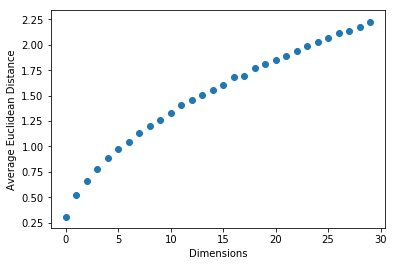

In [10]:
dimensions = 1
avgDists = []
for _ in range(30):
    points= []
    for _ in range(500):
        p = np.array([np.random.rand() for _ in range(dimensions)])
        points.append(p)

    total_distance = 0
    nb_pairs = 0
    for pair in list(itertools.combinations(points, 2)):
        nb_pairs +=1 
        total_distance += dist.euclidean(pair[0],pair[1])
    avgDist = total_distance/nb_pairs
    avgDists.append(avgDist)
    dimensions+=1
    print("Average distance is %s" % (avgDist))

plt.scatter(np.arange(30),avgDists)
plt.xlabel("Dimensions")
plt.ylabel("Average Euclidean Distance")

As you scale the dimensionality of a random distribution of points the average Euclidean distance increases. In other words average Euclidean distance increases monotonically as the number of dimensions increases.
Although our coordinates are in the normalized space, the average distance in 30D space is ~7 time larger than in a single dimension.
This introduces a problem when dealing with high-dimensional data.

## KDE in higher dimensionality

Recall that when calculating KDE, each point is given a kernel indicated in the graph below by the small red curves. Then the kernels are summed resulting in the KDE the blue line. This summation is only useful if points are relatively close together, as this would mean the small red curves would overlap, creating a distinct KDE.  

As we have seen above as you scale dimensionality the average pairwise distance between all points increases.
Therefore it logically follows with higher dimensionality KDE no longer works since there is minimal overlap of the kernels.
An example of this is indicated below.

<img src="./images/kde.png" alt="drawing" style="width:1000px;"/>

### Resources Used 

https://en.wikipedia.org/wiki/Euclidean_distance

https://en.wikipedia.org/wiki/Kernel_density_estimation

https://en.wikipedia.org/wiki/Metric_(mathematics)

https://en.wikipedia.org/wiki/Feature_scaling

http://www.econ.upf.edu/~michael/stanford/maeb4.pdf

https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf

https://www.storyjumper.com/book/index/45603856/The-Pythagorean-Theorem


# Random Projections

In [11]:
from IPython.display import Image
import random 
import numpy as np
import matplotlib.pyplot as pyplot 
import seaborn as sns

%matplotlib inline

### A case for dimensionality Reduction

- Suppose your are given counts for 20k features (genes) in two conditions (ex.: healthy vs. disease) it is reasonable to ask whether the gene expression patterns in the two conditions are distinct.

    - Are gene expression patterns more similar within rather than across conditions?
    
- Or suppose you are give 10,000 metrics for race cars that both won the Indianapolis 500 and came in last at the Indianapolis 500. It is reasonable to ask if the metrics of the two groups is distinct.
    
    - Are performance metrics more similar within rather than across winners and losers?
    
To answer these questions it would be ideal to visualize the distances across individuals. However as we saw previously (in the Curse of Dimensionality lecture notes) as **dimensionality** of a set of data **increases**, the **average distance** between the points **increases**. For 20K or 10K dimensions, data will become more **uniformly distant** from each other.

Furthermore, as we saw in the previous set of lecture notes, as dimensionality of a set of data increases we can not use some of the methods that worked for lower dimensionality data. For example, **KDE will not work** for higher dimensional data. 

Finally, **computational complexity increases** with higher dimensionality data.

Therefore we have a good reasons to reduce the dimensionality of the data if we can still explain the original data set. 

#### Dimensionality Reduction

This is called **dimensionality reduction**, which is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. Through dimensionality reduction, important features of higher dimensions are summarized into a data set of lower dimensions.

Oftentimes when looking at data with high dimensionality, many of the features of the data can be replaced by **representative variables** that combined can explain the original set. The 20k features or 10k features are most likely correlated as it is very unlikely that each dimension has no effect on another. If the features are correlated it would be logical to group those features together and form a representative variable, this representative variable should explain the original set of data. 

### Naive engineering

The simple way to group together data that is **correlated** is to do so based on **domain-knowledge**. A domain-expert could **eliminate** certain features that are **redundant** and explained by other parameters in the data. 

- For example

  - In the case of data on genetic code, one could start by de-replicating co-expressed genes, since these genes may be represented sufficiently by a subset of parameters present
  
  - In the case of metrics of a race car, some parameters may be unrelated to its performance at the Indianapolis 500 like sound level inside the cabin, or the number of cup holders present.  

However this approach is both time and effort intensive. 
Sufficient domain-knowledge is required, and even with sufficient knowledge with extremely high dimensionality there may be too many parameters to look at and summarize. It is also important to note if there is a set of features that are correlated, eliminating features must be done carefully as some features may be more valuable than the others. 

Even if time and effort are spent it still is unlikely to produce a dataset that can be visualized.


## Data projection

One method of dimensionality reduction is called data projection, or feature projection. **Data projection** transforms the data in the high-dimensional space to a space of fewer dimensions.
When reducing dimensionality we would want to retain the distances across data points. Dimensionality reduction will only be useful if it **does not distort** our data. It is almost impossible to perfectly capture the data when we reduce its dimensionality. Instead it is more realistic to ensure that at a base level that the **closest points remain close and distant points remain distant**.



<img src="images/data_projection_0_.png" alt="drawing" style="width:800px;"/>


The graph above shows a distribution of points in 2 dimensional space. If we are to reduce the dimensionality (to 1 dimensional space) we want to represent the original data. Note the two closest point indicated in orange, and the two furtherest points indicated in blue. 

###  Projecting Over Axis with Most Variance

There are infinite axes to project data over. The key to selecting the **optimal axis** is maintaining **as much variance as possible**. This way the closest points remain close and the distant points remain distant. If the axis selected removes much of a variance the projected data will not capture the information from the original set. 

We can make two main observations of this data set. 

1. There is a large variance over the x-axis. The difference in x coordinates between two most distant points is much larger than the distance between closest points. 

2. There is little variance over the y-axis. The distance in y coordinates between the most distant points is not much larger than the distance between closest points
  
If we are to maintain representation of the data as stated above we want the closest points to remain close and distant points remain distant.

Therefore, projecting over the $y-$axis is likely to distort the data. 
Instead, projecting over the $x-$axis is better option. 


<img src="images/data_projection_1_.png" alt="drawing" style="width:700px;"/>
Above is the graph projected over the 𝑥−axis.

<img src="images/data_projection_2_.png" alt="drawing" style="width:700px;"/>

Here is the graph projected over the y−axis.

#### Resources

https://en.wikipedia.org/wiki/Dimensionality_reduction

https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf

https://en.wikipedia.org/wiki/Kernel_density_estimation

In [13]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
%matplotlib inline

# from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

When it comes to dimensionality reduction, there are a few methods one might first think of, such as look for suitable subsets of coordinates, or sums of subsets, but these would all appear to take a long time or they simply don’t work.

Instead, the key technique is to take a random linear subspace of a certain dimension, and project every data point onto that subspace. No searching required. The fact that this works is called the Johnson-Lindenstrauss Lemma. 

In this example, we use the scikit-learn digits dataset, which consists of 1797 sample of handwritten digit images of the numbers 0-9 and attempt to classify them.

Knowing only the number of samples, the 
##### sklearn.random_projection.johnson_lindenstrauss_min_dim 
estimates conservatively the minimal size of the random subspace to guarantee a bounded distortion introduced by the random projection:

In [14]:
from sklearn import datasets
from sklearn.random_projection import johnson_lindenstrauss_min_dim

digits = datasets.load_digits()

johnson_lindenstrauss_min_dim(1797,eps=0.1)

6423

### Calculating the minimum number of required dimensions

Given that we have 1,797 data points, in order to preserve their pairwise Euclidean distances within a tolerance of 0.1 epsilon, our random projection matrix should have 6,423 components according to the Johnson Lindenstrauss lemma.

### Reducing Dimensions

Each digit image is 8x8 pixels, so we'll be treating each 8x8 image as a flattened feature vector of length 64. This means we must attempt to reduce these 64 features to 6423 using sparse random projections. However, it also means that we can't make any assumptions regarding the preservation of pairwise distances between data points.

In [15]:
accuracies = []
components = np.int32(np.linspace(2, 64, 20))

split = train_test_split(digits.data, digits.target, test_size = 0.3,
    random_state = 42)
(trainData, testData, trainTarget, testTarget) = split

model = LinearSVC()
model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)

for comp in components:
    # create the random projection
    sp = SparseRandomProjection(n_components = comp)
    X = sp.fit_transform(trainData)
 
    # train a classifier on the sparse random projection
    model = LinearSVC()
    model.fit(X, trainTarget)
 
    # evaluate the model and update the list of accuracies
    test = sp.transform(testData)
    accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

/home/muzamil/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/muzamil/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/muzamil/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/muzamil/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/muzamil/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

#### Test: Sparse Random Projection on a Linear SVC Model

Above, we aim to evaluate 20 different component sizes, equally spaced from 2 to 64. We perform a training and testing split on the digits data and obtain a baseline accuracy (before any random projection is done). We then loop through our components and instantiate a SparseRandomProjection to transform the original training data by projecting the sparse representation before training with a Linear SVC model.

Below, we plot the random projection accuracy based on number of components:

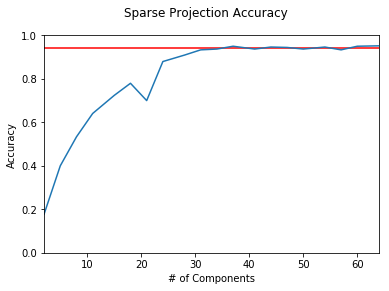

In [17]:
plt.figure()
plt.suptitle("Sparse Projection Accuracy")
plt.xlabel("# of Components")
plt.ylabel("Accuracy")
plt.xlim([2, 64])
plt.ylim([0, 1.0])
 
# plot the baseline and random projection accuracies
plt.plot(components, [baseline] * len(accuracies), color = "r")
plt.plot(components, accuracies)

plt.show()

### When is Random Projection is an ideal option?
- when data is so high dimensional that it is too expensive to compute principal components directly
- when you do not have access to all the data at once, as in data streaming
- when data is approximately low-dimensional, but not near a linear subspace


# Principal Components Analysis (PCA)
Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in Introducing Scikit-Learn. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 500 points:

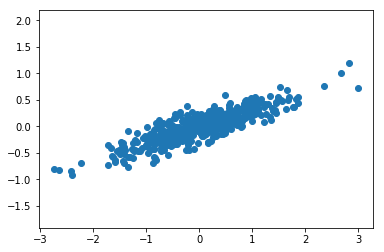

In [18]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 500)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Methods like Linear Regression may attempt to predict the y values from the x values, but in PCA the relationship between x and y is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. We can use scikit-learn's PCA estimator to compute these axes:

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Extracting meaning from PCA estimation

This estimator learns certain quantities from our data, most importantly the 'components' and 'explained variance'. To understand what these mean, we can visualize them as vectors over our data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

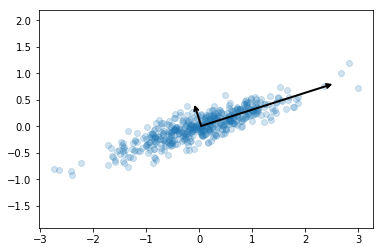

In [20]:
def vector_vis(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    vector_vis(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data. This is ideal because we prefer to project on the axis that maximizes the variance in the data.

In [21]:
from IPython.display import Image
import random 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd

# we will be using preprocessing to normalize the data
from sklearn.preprocessing import StandardScaler

# we will be using LA to find eigenvectors
from numpy import linalg as LA


from sklearn.decomposition import PCA

%matplotlib inline

#### Contextualizing PCA

* We prefer to project on the axis that maximizes the variance in the data. 

* It's helpful to think of the variance as the information that is contained in the data. 

* We want the axis that maximize the information contained in the data.

* This axis, does not have to be one of the axes of the coordinate system.


* If we rotate the data points from the previous example by 45°, then the $x-$axis is no longer the axis that maximizes the variance.

### The Axis Maximizing the Variance

The overall approach of PCA is to reduce the complexity of the dataset as much as possible without jeopardizing its variance. While dimensionality reduction is used to remove irrelevant or unnecessary dimensions for pinpointing correlations, removing too many or crucial dimensions may result in an undesirable dataset of tightly packed values. 

This indicates that the variance, or distribution of data, has been reduced significantly. Depending on the resulting dimensions the dataset has been reduced to, known in PCA as a set of axes called "components", the datapoints may become compressed and lose most of their original variance.

PCA aims to avoid this situation by selecting components that maximize the variance after the number of dimensions is reduced.

For example, observe the following randomized dataset of 2 dimensions:

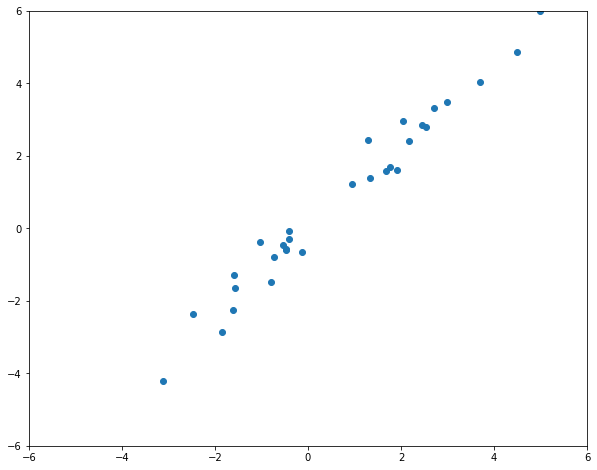

In [22]:
# randomized x-axis from a normal distribution
random.seed(246)
x_axis = np.random.normal(0, 2, 30)
x_axis.sort()

# randomized y-axis is a multiple of the x-axis combined with noise from a normal districution
noise = np.random.normal(0, 0.5, 30)
y_axis = x_axis * 1.2 + noise

randomData = pd.DataFrame({'x': x_axis, 'y': y_axis})

plt.figure(figsize=(10,8))
_ = plt.ylim(-6, 6)
_ = plt.xlim(-6, 6)

plt.scatter(x_axis, y_axis)

PCA will attempt to reduce the number of dimensions in this dataset. Since it consists of only 2 dimensions, PCA will try to find a single component (axis) on which to project the data, effectively reducing the data from 2 dimensions to 1. 

The chosen axis is not limited to the x or y axes that originally defined the dataset. Instead, there are an inifinite number of axes that could be chosen. For simplicity, in the following example we will compare 3 different axes from which PCA will select the best option. The axes are shown below on the same plot as the data.

/home/muzamil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-4, 2.2, 'proj_line_3')

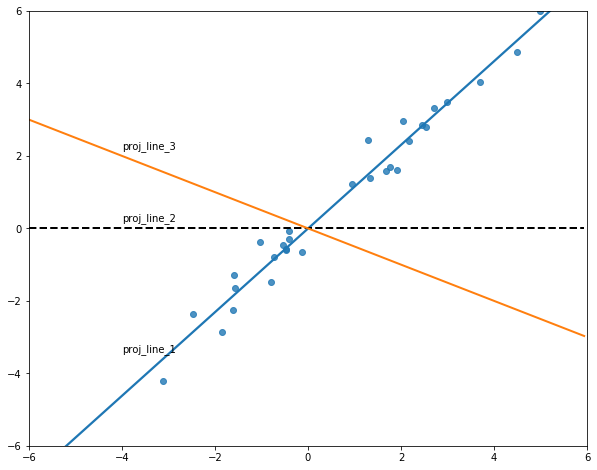

In [23]:
plt.figure(figsize=(10,8))
_ = plt.ylim(-6, 6)
_ = plt.xlim(-6, 6)

# Possible projection line 1
sns.regplot(x_axis, y_axis, ci=False,)
plt.text(-4, -3.4, 'proj_line_1')

# Possible projection line 2
pyplot.plot(np.arange(-6, 6, 0.06), [0 for _ in np.arange(-6, 6, 0.06)], 'k--', lw=2)
pyplot.text(-4, 0.2, 'proj_line_2')

# Possible projection line 3
pyplot.plot(np.arange(-6, 6, 0.06), [-x/2. for x in np.arange(-6, 6, 0.06)], '-', lw=2)
pyplot.text(-4, 2.2, 'proj_line_3')

PCA will evaluate the variance of each possible projection line, then select axis with the greatest variance. `numpy` contains the method `var`, which can be used to calculate the variance across the provided axis.

The first projection line is represented by the the dot product of 1 and 1. Using `np.var`, the following variance is calculated.

In [24]:
# Possible projection line 1 (positive slope of +1.0)
np.var(randomData.dot(np.array([[1],[1]])))

0    19.902622
dtype: float64

This variance can be observed when the data is projected on the component. Note how in the projection below, the values still remain spread out along the axis despite being contained to a single dimension.

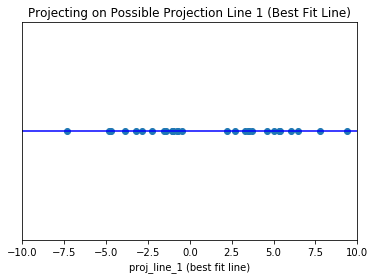

In [25]:
plt.xlabel('proj_line_1 (best fit line)')

plt.title('Projecting on Possible Projection Line 1 (Best Fit Line)')

plt.plot(np.arange(-12,12, 0.1), [0 for _ in np.arange(-12,12, 0.1)], 'b')
plt.scatter(randomData.dot(np.array([1,1])), [0 for _ in range(len(randomData))])

plt.xlim(-10, 10)

ax = plt.gca()

ax.yaxis.set_visible(False)

Now PCA evaluates the variance of the second possible projection line, which is represented by the the dot product of 1 and 0. Using np.var, the following variance is calculated.

In [26]:
# Possible projection line 1 (x-axis, slope of 0)
np.var(randomData.dot(np.array([[1], [0]])))

0    4.252231
dtype: float64

The variance of the second possible projection line is much smaller than the variance of the first possible projection line. Notice below that when the data is projected on the axis, the spread of the data is much smaller than the projection line 1. On projection line 1, the data ranged from about -7.5 to +10.0, whereas on projection line 2, the data only ranges between -5.0 and +5.0.

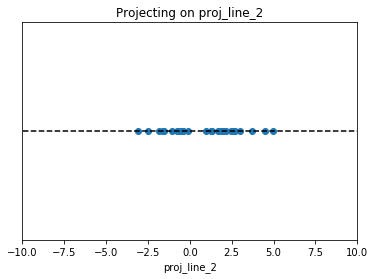

In [27]:
plt.xlabel('proj_line_2')
plt.title('Projecting on proj_line_2')

plt.plot(np.arange(-12,12, 0.1), [0 for _ in np.arange(-12,12, 0.1)], 'k--')
plt.scatter(randomData.dot(np.array([[1],[0]])), [0 for _ in range(len(randomData))])

plt.xlim(-10, 10)

ax = plt.gca()

ax.yaxis.set_visible(False)

Finally, PCA evaluates the variance of the third possible projection line, which is represented by the the dot product of 1 and -0.5. Using np.var, the following variance is calculated.

In [28]:
# Possible projection line 3 (negative slope of -0.5)
np.var(randomData.dot(np.array([[1], [-0.5]])))

0    0.805544
dtype: float64

The variance of the third possible projection line is even less than the second possible projection line, almost at zero. This is demonstrated when the data is projected on projection line 3, in an even smaller range than the two previous lines. Projection line 1 contained data from about -7.5 to +10.0, a span of about 17.5 units, and projection line contained data from about -5.0 to +5.0, a slightly smaller span of 10.0 units. Projection line 3, however, contains data ranging only from about -2.5 to 2.5, a span of merely 5.0 units.

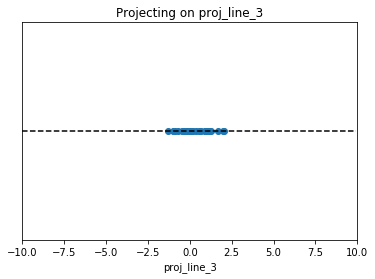

In [29]:
plt.xlabel('proj_line_3')
plt.title('Projecting on proj_line_3')

plt.plot(np.arange(-10,10, 0.1), [0 for _ in np.arange(-10,10, 0.1)], 'k--')
plt.scatter(randomData.dot(np.array([[1],[-0.5]])), [0 for _ in range(len(randomData))])

plt.xlim(-10, 10)

ax = plt.gca()

ax.yaxis.set_visible(False)

Thus, PCA would select projection line 1 as the axis to project the data on, since it both reduces the dimensionality of the data while maximizing the variance from the set of possible axes to project the data upon.

### What is PCA?

To reiterate, the objective of PCA is to reduce the dimensionality of a dataset to a small set of axes called "components", on which the data will be projected upon. The components that are chosen maximize the variance, in order to preserve the distribution of the data while eliminating unneeded complexity.

The size of the components is dependent on the amount of dimensions needed to capture the most variability in the data. The components should still be capable of reproducing the data despite being of a lesser dimension.

Typically, data that is to be visualized is reduced to two or three components, since anything larger is impossible for the human to imagine or display. Unfortunately, not all datasets are able to be reduced to such a small number of components.

### PCA Requirements

PCA has two requirements to complete properly.

First, __the components must be ranked in descending order by the amount of variability in the data they capture.__ That is, the first component must capture more variability than the second component, the second more than the third, and so on. Note that as the rank of the component increases, the variance decreases. The variability will decrease until 0, so the analysis should usually be concluded around the 2nd component when the components still capture a lot of variability.

Secondly, __the components must orthogonal and therefore uncorrelated.__ This requirement is necessary to force components to be unique, which will reveal distinct information about the data. Components that are orthogonal, meaning at right angles, cannot be correlated since they have opposing slopes. If the components were not orthogonal, it would be problematic to determine to what degree each components affects the data, since they could have a combined effect that relies on both components but has a different effect inidividually.

### Scaling the Data

In addition to the requirements above, the data must be appropriately scaled to avoid any one axis being favored for its inherent variance.

For example, consider a dataset measuring the physical fitness of a person. It may contain contains two dimensions, $x_1$, representing body mass index (BMI) and $x_2$, representing steps taken in a single day. BMI typically ranges between values 12 and 49. The number of steps taken can range anywhere from 0 (immobile), to 10,000 (recommended), or more. The magnitude of $x_2$ is over 200 times the magnitude of $x_1$. Thus, the variance of $x_2$ strongly overwhelms the variance of $x_1$, such that $x_2$ is much likelier to be selected as a component than $x_1$, simply for being measured in different units.

To defend against such bias, the data is often normalized before carrying out PCA. This is typically done by centering the data at 0 and normalizing by the variance. This is can be done for instance using the standard score:

$$
x_{new}=\frac{x -\mu}{\sigma}
$$

Afterwards, data can be used to find the eigenvector with the largest eigenvalue, then projected on that vector first.

### Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are concepts of linear algebra. While a brief explanation of these concepts is all that is necessary for the following examples, detailed information on eigenvalues and eigenvectors can be found in this [introductory linear algebra textbook online](https://math.mit.edu/~gs/linearalgebra/ila0601.pdf).

An __eigenvector__ is a non-zero vector that only changes by an overall scale when a linear transformation is applied to it, in other words, when a matrix is multiplied by it. It does not change direction. An __eigenvalue__ is the scalar value $\lambda$ by which the vector was stretched during the linear transformation.

As an equation, this is depicted as:

$$
\mathbf{A} \mathbf{u} = \lambda\mathbf{u}
$$

where $\mathbf{A}$ is a matrix, $\mathbf{u}$ is the eigenvector, and $\lambda$ is the eigenvalue.

### Check your understanding

Suppose you have the following matrix, $\mathbf{A}$:

$
A =
\left( \begin{array}{cc}
3 & -5 \\
1 & 2 \\
\end{array} \right)
$

and the eigenvector $\mathbf{u}$:

$
\mathbf{u}= \left( \begin{array}{c}
1\\
4\\
\end{array} \right)
$

#### Question
Is $\mathbf{u}$ an eigenvector for $\mathbf{A}$?

#### Solution
Recall that an eigenvector is a vector, that when multiplied to a matrix, expands in scale but does not change direction. Therefore, to determine if the vector $\mathbf{u}$ is an eigenvector for $\mathbf{A}$, you must determine if the vector $\mathbf{A}\mathbf{u}$ is in the same direction as $\mathbf{u}$ but of a greater magnitude.

The linear transformation of $\mathbf{u}$ into $\mathbf{u'}$ is calculated by finding the dot product of $\mathbf{A}$ and $\mathbf{u}$:

$$
u' = Au =
\left( \begin{array}{cc}
3 & -5 \\
1 & 2 \\
\end{array} \right)
\cdot
\left( \begin{array}{c}
1\\
4\\
\end{array} \right)
=
\left( \begin{array}{cc}
3x1 & -5x4 \\
1x1 & 2x4 \\
\end{array} \right)
=
\left( \begin{array}{c}
-17\\
9\\
\end{array} \right)
$$

Plotted on the same graph below, $\mathbf{u}$ (in red) and $\mathbf{u'}$ (in blue) are clearly different in both scale and direction. Therefore, $\mathbf{u}$ is __not__ an eigenvector of $\mathbf{A}$.

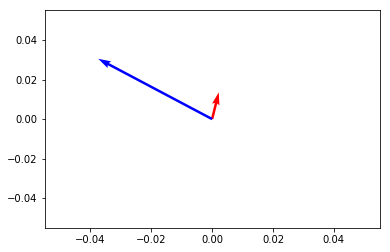

In [30]:
V = np.array([[1,4],[-17,9]])
origin = [0], [0]

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=50)

### Finding the Eigenvales and Eigenvectors Using `numpy`

The `linalg` module in `numpy` contains the method `eig`, which can be used to find the eigenvalues and eigenvectors for a matrix. `eig` takes a single argument, a list of matrices for which eigenvalues and eigenvectors will be computed individually. Note that the matrices must be square in shape, meaning the number of rows must be equivalent to the number of columns.

#### Example
Observe the following use of `eig`, which computes two eigenvalues and eigenvectors for the matrix $\mathbf{A}$, where

$$
A =
\left( \begin{array}{cc}
3 & 0 \\
1 & 6 \\
\end{array} \right)
$$


In [31]:
# representing matrix A as a numpy array
A = np.array([[3,0], [1,6]])

# w = eigenvalues
# v = normalized eigenvectors
w, v = LA.eig(A)

print("Eigenvalues:")
print(w)
print("Eigenvectors:")
print(v)

Eigenvalues:
[6. 3.]
Eigenvectors:
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


The returned eigenvector list (in this example, v) is formatted such that each column is an eigenvector. The eigenvectors are listed in order of greatest eigenvalue. In the example above, the eigenvectors of matrix $\mathbf{A}$ are 

$$
\mathbf{u_1}= \left( \begin{array}{c}
0\\
1\\
\end{array} \right)
$$ as the first eigenvector and 

$$
\mathbf{u_2}= \left( \begin{array}{c}
0.9486833 \\
-0.31622777\\
\end{array} \right)
$$ as the second eigenvector

We can check that the first eigenvector returned by `eig`, $\mathbf{u_1}$, is truly an eigenvector by calculating $\mathbf{A}\mathbf{u_1}$ and comparing it to the $\mathbf{u_1}$.

The calculations for $\mathbf{A}\mathbf{u_1}$ are as follows:

$$
u' = Au_1 =
\left( \begin{array}{cc}
3 & 0 \\
1 & 6 \\
\end{array} \right)
\cdot
\left( \begin{array}{c}
0\\
1\\
\end{array} \right)
=
\left( \begin{array}{cc}
3x0 & 0x1 \\
1x0 & 6x1 \\
\end{array} \right)
=
\left( \begin{array}{c}
0\\
6\
\end{array} \right)
=
6u_1
$$

Thus, we see that $\mathbf{u'}$ is simply $6\mathbf{u_1}$, meaning that when $\mathbf{u_1}$ underwent a linear transformation from being multiplied to $\mathbf{A}$, the resulting vector stretched by a factor of 6, but did not change directions. This is emphasized by plotting both $\mathbf{u'}$ and $\mathbf{u_1}$ on the same graph, as below.

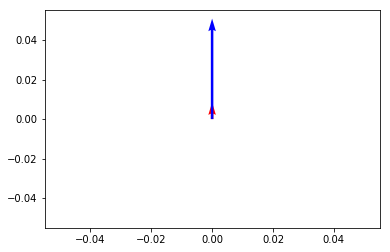

In [32]:
V = np.array([[0,1],[0,6]])
origin = [0], [0]

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=20)

Both $\mathbf{u_1}$, shown in red above, and $\mathbf{u'}$, shown in blue above, are pointed vertically in the same direction. However, $\mathbf{u'}$ is 6 times as long as $\mathbf{u_1}$.

The degree to which $\mathbf{u'}$ is longer than $\mathbf{u_1}$ is the eigenvector. Recall that the first value of w calculated by `eig` above was 6, the same as the number of times longer $\mathbf{u'}$ is than the first eigenvector $\mathbf{u_1}$.

The same steps can be applied to the second eigenvector, which has a calculated eigenvalue of 3.